In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


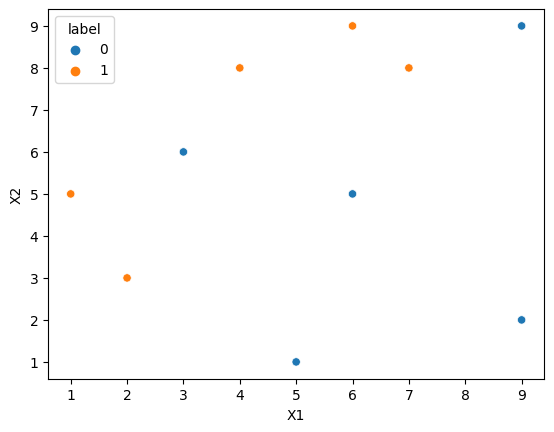

In [5]:
import seaborn as sns
sns.scatterplot(x = df['X1'], y= df['X2'], hue=df['label'])
plt.show()

In [6]:
df.shape

(10, 3)

Step 1

In [7]:
#Initial Weight
df['weights'] = 1 / df.shape[0]

In [8]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


- Decision Stump: A basic decision tree model with only one split, typically used as a weak learner.
- It makes decisions based on a single feature and a threshold value, dividing the data into two groups.
- Decision stumps are shallow, simple, and computationally efficient, often used in ensemble methods like AdaBoost.

In [9]:
from sklearn.tree import DecisionTreeClassifier
# max_depth=1 because Adaboost has Decision Stumps
dt1 = DecisionTreeClassifier(max_depth=1)

X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

Step 2: Train 1st model

In [10]:
dt1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

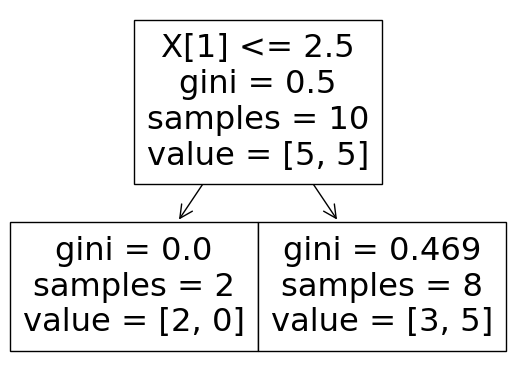

In [11]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

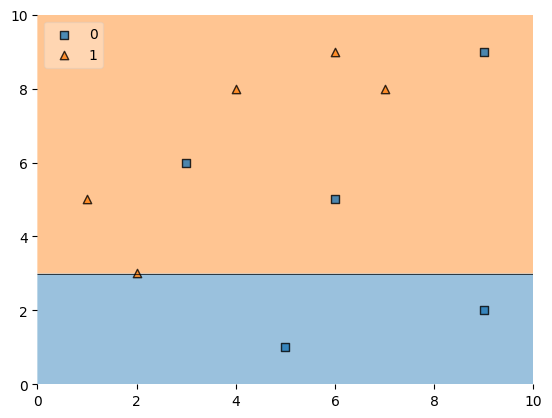

In [12]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [13]:
df['y_pred'] = dt1.predict(X)

In [14]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


The function `calculate_model_weight(error)` is implementing the formula for computing the weight of a weak learner (often referred to as alpha_t in the AdaBoost algorithm. The formula is as follows:

`α_t​ = 1/2 ln (1 - error / error​)`

Where:
- α_t is the weight of the weak learner.
- (error) is the weighted error rate of the weak learner, calculated as the sum of weights of misclassified samples divided by the total weight of all samples.

This weight determines the influence of the weak learner in the final ensemble model. The function computes this weight based on the error rate of the weak learner. It uses the natural logarithm (`np.log` in this case) and scaling by 1/2 to adjust the weight appropriately.

In [15]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [16]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [17]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [18]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [19]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [20]:
df['updated_weights'].sum()

0.9165153319682015

In [21]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [22]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [23]:
df['nomalized_weights'].sum()

1.0

In [24]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [25]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [26]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [27]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [28]:
index_values = create_new_dataset(df)

index_values

[5, 2, 1, 6, 3, 0, 8, 3, 6, 4]

In [29]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [30]:
second_df

,X1,X2,label,weights
5,6,9,1,0.1
2,3,6,0,0.1
1,2,3,1,0.1
6,6,5,0,0.1
3,4,8,1,0.1
0,1,5,1,0.1
8,9,9,0,0.1
3,4,8,1,0.1
6,6,5,0,0.1
4,5,1,0,0.1


In [31]:
dt2 = DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 4.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.75, 0.25, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]')]

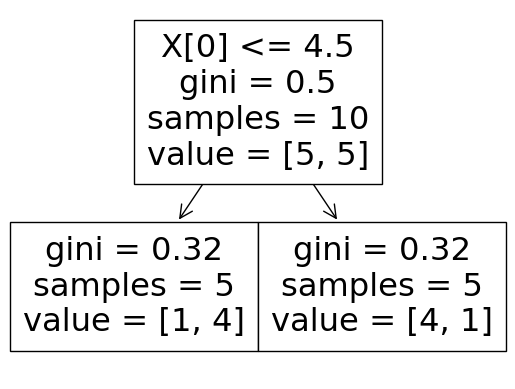

In [32]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values
     
dt2.fit(X,y)
plot_tree(dt2)


<Axes: >

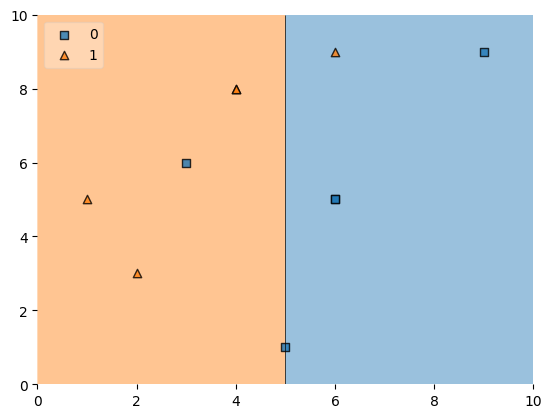

In [33]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [34]:
second_df['y_pred'] = dt2.predict(X)

In [35]:
second_df

,X1,X2,label,weights,y_pred
5,6,9,1,0.1,0
2,3,6,0,0.1,1
1,2,3,1,0.1,1
6,6,5,0,0.1,0
3,4,8,1,0.1,1
0,1,5,1,0.1,1
8,9,9,0,0.1,0
3,4,8,1,0.1,1
6,6,5,0,0.1,0
4,5,1,0,0.1,0


In [36]:
alpha2 = calculate_model_weight(0.1)

In [37]:
alpha2

1.0986122886681098

In [38]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [39]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [40]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
5,6,9,1,0.1,0,0.297427
2,3,6,0,0.1,1,0.297427
1,2,3,1,0.1,1,0.033622
6,6,5,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
0,1,5,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
6,6,5,0,0.1,0,0.033622
4,5,1,0,0.1,0,0.033622


In [41]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [42]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
5,6,9,1,0.1,0,0.297427,0.344313
2,3,6,0,0.1,1,0.297427,0.344313
1,2,3,1,0.1,1,0.033622,0.038922
6,6,5,0,0.1,0,0.033622,0.038922
3,4,8,1,0.1,1,0.033622,0.038922
0,1,5,1,0.1,1,0.033622,0.038922
8,9,9,0,0.1,0,0.033622,0.038922
3,4,8,1,0.1,1,0.033622,0.038922
6,6,5,0,0.1,0,0.033622,0.038922
4,5,1,0,0.1,0,0.033622,0.038922


In [43]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [44]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [45]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [46]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
5,6,9,1,0.1,0,0.344313,0.000000,0.344313
2,3,6,0,0.1,1,0.344313,0.344313,0.688626
1,2,3,1,0.1,1,0.038922,0.688626,0.727548
6,6,5,0,0.1,0,0.038922,0.727548,0.766470
3,4,8,1,0.1,1,0.038922,0.766470,0.805392
0,1,5,1,0.1,1,0.038922,0.805392,0.844313
8,9,9,0,0.1,0,0.038922,0.844313,0.883235
3,4,8,1,0.1,1,0.038922,0.883235,0.922157
6,6,5,0,0.1,0,0.038922,0.922157,0.961078
4,5,1,0,0.1,0,0.038922,0.961078,1.000000


In [47]:
index_values = create_new_dataset(second_df)

In [48]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [49]:
third_df

,X1,X2,label,weights
6,6,5,0,0.1
0,1,5,1,0.1
1,2,3,1,0.1
1,2,3,1,0.1
1,2,3,1,0.1
6,6,5,0,0.1
0,1,5,1,0.1
1,2,3,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1


In [50]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

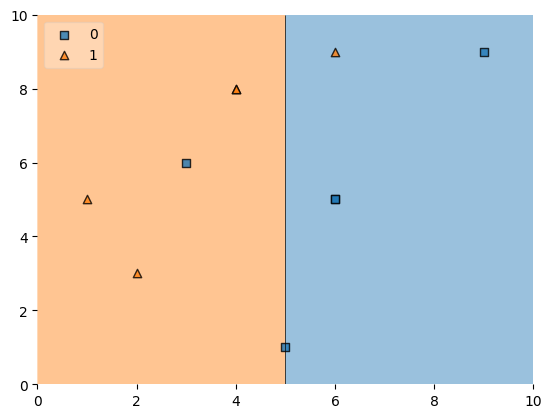

In [51]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [52]:
third_df['y_pred'] = dt3.predict(X)

In [53]:
third_df

,X1,X2,label,weights,y_pred
6,6,5,0,0.1,0
0,1,5,1,0.1,1
1,2,3,1,0.1,1
1,2,3,1,0.1,0
1,2,3,1,0.1,1
6,6,5,0,0.1,1
0,1,5,1,0.1,0
1,2,3,1,0.1,1
0,1,5,1,0.1,0
0,1,5,1,0.1,0


In [54]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [55]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


### Prediction

In [56]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [58]:
dt2.predict(query)

array([1], dtype=int64)

In [59]:
dt3.predict(query)

array([1], dtype=int64)

In [60]:
alpha1*1 + alpha2*(1) + alpha3*(1)

1.09861228866811

In [61]:
np.sign(1.09)

1.0

In [62]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [63]:
dt2.predict(query)

array([0], dtype=int64)

In [64]:
dt3.predict(query)

array([0], dtype=int64)

In [65]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-0.2513144282809062

In [66]:
np.sign(-0.25)

-1.0